**QUESTION 4**

Student Attendance Dashboard for Decision Making. You will be given a Google Sheet with different sheets holding data of different classes. Create a dashboard showing a summary of what's happening across different classes. Which students need attention for missing sessions? Which students are unsatisfied? Which students are very satisfied? Column shows attendance. R- Column shows the rating by the candidate. Extra marks for identifying more useful insights. Missing values of the Type column can be treated as STUDENT. This data gets updated on a daily basis. The latest data gets injected in early columns. Your code shouldn't need any changes to deal with the latest data. Please note: Visualisation is mandatory. You will receive 0 marks if you do not add visualisation.

Data Link - https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing

Import Packages

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
cls1 = pd.read_csv("https://raw.githubusercontent.com/sriharsha18-reddy/DS_Project_Questions/main/Batchwise%20Attendance%20Data%20-%20Class%201%20(1).csv")
cls2 = pd.read_csv("https://raw.githubusercontent.com/sriharsha18-reddy/DS_Project_Questions/main/Batchwise%20Attendance%20Data%20-%20Class%202%20(1).csv")

In [47]:
cls1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,10,Missed,7,Missed,6,Missed,9,...,Missed,5,Missed,7,Missed,7,Missed,5,Missed,5
1,2,NaN,Missed,8,Missed,6,Missed,5,Attended,5,...,Attended,6,Attended,6,Missed,5,Attended,5,Missed,5
2,3,STUDENT,Missed,10,Missed,10,Missed,9,Missed,6,...,Attended,8,Missed,8,Missed,9,Attended,6,Attended,6
3,4,STUDENT,Missed,7,Missed,9,Attended,7,Missed,5,...,Missed,7,Attended,6,Attended,6,Attended,6,Attended,5
4,5,WORKING,Missed,9,Missed,7,Missed,9,Missed,10,...,Missed,7,Missed,6,Missed,10,Missed,9,Missed,6


In [48]:
cls2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,9,Attended,10,Attended,7,Attended,5,Attended,5,Attended,5,Attended,9,Missed,7,NaN,NaN
1,2,NaN,Attended,10,Attended,8,Attended,7,Attended,8,Attended,8,Attended,5,Attended,5,Attended,5,NaN,NaN
2,3,STUDENT,Missed,8,Missed,8,Missed,10,Missed,10,Missed,7,Missed,8,Missed,7,Missed,9,NaN,NaN
3,4,NaN,Attended,10,Attended,10,Attended,7,Attended,5,Missed,8,Missed,5,Attended,5,Attended,5,NaN,NaN
4,5,WORKING,Attended,7,Attended,5,Attended,6,Missed,8,Missed,7,Missed,9,Missed,5,Missed,8,NaN,NaN


In [49]:
print(cls1.shape)
print(cls2.shape)

(57, 22)
(70, 20)


**CLASS 1 -**

In [50]:
cls1.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [51]:
cls1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student Roll Num  57 non-null     int64 
 1   Type              32 non-null     object
 2   10-01-21          57 non-null     object
 3   R-10-01-21        57 non-null     int64 
 4   09-01-21          57 non-null     object
 5   R-9-01-21         57 non-null     int64 
 6   08-01-21          57 non-null     object
 7   R-8-01-21         57 non-null     int64 
 8   07-01-21          56 non-null     object
 9   R-7-01-21         57 non-null     int64 
 10  06-01-21          56 non-null     object
 11  R-6-01-21         57 non-null     int64 
 12  05-01-21          56 non-null     object
 13  R-5-01-21         57 non-null     int64 
 14  04-01-21          56 non-null     object
 15  R-4-01-21         57 non-null     int64 
 16  03-01-21          56 non-null     object
 17  R-3-01-21         

In [52]:
cls1.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21,R-02-01-21,R-01-01-21
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,29.000000,7.245614,7.526316,7.807018,7.596491,7.701754,7.649123,7.614035,7.596491,7.561404,7.403509
std,16.598193,1.805554,1.680830,1.726253,1.761287,1.625301,1.663594,1.578362,1.791444,1.861427,1.791444
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,15.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,29.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
75%,43.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,57.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [53]:
cls1.isnull().sum().sort_values(ascending=False).head(10)

Type                25
01-01-21             1
02-01-21             1
03-01-21             1
07-01-21             1
04-01-21             1
06-01-21             1
05-01-21             1
Student Roll Num     0
R-5-01-21            0
dtype: int64

In [54]:
cls1["01-01-21"].fillna(cls1["01-01-21"].mode()[0], inplace=True)

In [55]:
cls1["02-01-21"].fillna(cls1["02-01-21"].mode()[0], inplace=True)

In [56]:
cls1["03-01-21"].fillna(cls1["03-01-21"].mode()[0], inplace=True)

In [57]:
cls1["04-01-21"].fillna(cls1["04-01-21"].mode()[0], inplace=True)

In [58]:
cls1["05-01-21"].fillna(cls1["05-01-21"].mode()[0], inplace=True)

In [59]:
cls1["06-01-21"].fillna(cls1["06-01-21"].mode()[0], inplace=True)

In [60]:
cls1["07-01-21"].fillna(cls1["07-01-21"].mode()[0], inplace=True)

In [61]:
cls1['Type'].fillna(cls1['Type'].mode()[0], inplace=True)

In [62]:
cls1.isnull().sum().sort_values(ascending=False).head(10)

Student Roll Num    0
Type                0
01-01-21            0
R-02-01-21          0
02-01-21            0
R-3-01-21           0
03-01-21            0
R-4-01-21           0
04-01-21            0
R-5-01-21           0
dtype: int64

In [63]:
cls1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,10,Missed,7,Missed,6,Missed,9,...,Missed,5,Missed,7,Missed,7,Missed,5,Missed,5
1,2,STUDENT,Missed,8,Missed,6,Missed,5,Attended,5,...,Attended,6,Attended,6,Missed,5,Attended,5,Missed,5
2,3,STUDENT,Missed,10,Missed,10,Missed,9,Missed,6,...,Attended,8,Missed,8,Missed,9,Attended,6,Attended,6
3,4,STUDENT,Missed,7,Missed,9,Attended,7,Missed,5,...,Missed,7,Attended,6,Attended,6,Attended,6,Attended,5
4,5,WORKING,Missed,9,Missed,7,Missed,9,Missed,10,...,Missed,7,Missed,6,Missed,10,Missed,9,Missed,6


**CLASS 2 -**

In [64]:
cls2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,9,Attended,10,Attended,7,Attended,5,Attended,5,Attended,5,Attended,9,Missed,7,NaN,NaN
1,2,NaN,Attended,10,Attended,8,Attended,7,Attended,8,Attended,8,Attended,5,Attended,5,Attended,5,NaN,NaN
2,3,STUDENT,Missed,8,Missed,8,Missed,10,Missed,10,Missed,7,Missed,8,Missed,7,Missed,9,NaN,NaN
3,4,NaN,Attended,10,Attended,10,Attended,7,Attended,5,Missed,8,Missed,5,Attended,5,Attended,5,NaN,NaN
4,5,WORKING,Attended,7,Attended,5,Attended,6,Missed,8,Missed,7,Missed,9,Missed,5,Missed,8,NaN,NaN


In [65]:
cls2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student Roll Num  70 non-null     int64  
 1   Type              30 non-null     object 
 2   10-01-21          70 non-null     object 
 3   R-10-01-21        70 non-null     int64  
 4   09-01-21          70 non-null     object 
 5   R-9-01-21         70 non-null     int64  
 6   08-01-21          70 non-null     object 
 7   R-8-01-21         70 non-null     int64  
 8   07-01-21          69 non-null     object 
 9   R-7-01-21         70 non-null     int64  
 10  06-01-21          69 non-null     object 
 11  R-6-01-21         70 non-null     int64  
 12  05-01-21          69 non-null     object 
 13  R-5-01-21         70 non-null     int64  
 14  04-01-21          69 non-null     object 
 15  R-4-01-21         70 non-null     int64  
 16  03-01-21          67 non-null     object 
 17 

In [66]:
cls2.describe()

,Student Roll Num,R-10-01-21,R-9-01-21,R-8-01-21,R-7-01-21,R-6-01-21,R-5-01-21,R-4-01-21,R-3-01-21,01-01-21,R-01-01-21
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,0.0,0.0
mean,35.500000,7.371429,7.428571,7.442857,7.614286,7.742857,7.20000,7.400000,7.557143,NaN,NaN
std,20.351085,1.634514,1.707370,1.749830,1.835976,1.585128,1.79855,1.609753,1.500104,NaN,NaN
min,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,NaN,NaN
25%,18.250000,6.000000,6.000000,6.000000,6.000000,7.000000,5.25000,6.000000,7.000000,NaN,NaN
50%,35.500000,7.000000,7.000000,7.000000,8.000000,8.000000,7.00000,7.000000,7.500000,NaN,NaN
75%,52.750000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,NaN,NaN
max,70.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,NaN,NaN


In [67]:
cls2.isnull().sum().sort_values(ascending=False).head(10)

R-01-01-21    70
01-01-21      70
Type          40
03-01-21       3
07-01-21       1
04-01-21       1
05-01-21       1
06-01-21       1
R-8-01-21      0
R-7-01-21      0
dtype: int64

In [68]:
cls2['03-01-21'].fillna(cls2['03-01-21'].mode()[0], inplace=True)

In [69]:
cls2['04-01-21'].fillna(cls2['04-01-21'].mode()[0], inplace=True)
cls2['05-01-21'].fillna(cls2['05-01-21'].mode()[0], inplace=True)
cls2['06-01-21'].fillna(cls2['06-01-21'].mode()[0], inplace=True)
cls2['07-01-21'].fillna(cls2['07-01-21'].mode()[0], inplace=True)

In [70]:
cls2['Type'].fillna(cls2['Type'].mode()[0], inplace=True)

In [71]:
cls2.isnull().sum().sort_values(ascending=False).head(10)

R-01-01-21    70
01-01-21      70
Type           0
R-3-01-21      0
03-01-21       0
R-4-01-21      0
04-01-21       0
R-5-01-21      0
05-01-21       0
R-6-01-21      0
dtype: int64

Let's Merge files now

In [72]:
cls1.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [73]:
df = pd.concat([cls1, cls2])

In [74]:
df.columns

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21',
       '01-01-21', 'R-01-01-21'],
      dtype='object')

In [75]:
df.shape

(127, 22)

In [76]:
df.fillna(0,inplace=True)

In [77]:
df.isna().sum()

Student Roll Num    0
Type                0
10-01-21            0
R-10-01-21          0
09-01-21            0
R-9-01-21           0
08-01-21            0
R-8-01-21           0
07-01-21            0
R-7-01-21           0
06-01-21            0
R-6-01-21           0
05-01-21            0
R-5-01-21           0
04-01-21            0
R-4-01-21           0
03-01-21            0
R-3-01-21           0
02-01-21            0
R-02-01-21          0
01-01-21            0
R-01-01-21          0
dtype: int64

**Visualization Part**

In [78]:
# Calculate the attendance count and missed count for each type

df['Attended_Count'] = df[df == 'Attended'].count(axis=1)
df['Missed_Count'] = df[df == 'Missed'].count(axis=1)

In [79]:
# Calculate the total sessions for each type
df['Total_Sessions'] = df[['Attended_Count', 'Missed_Count']].sum(axis=1)

In [80]:
# Calculate the attendance percentage and missed percentage for each type
df['Attended_Percentage'] = (df['Attended_Count'] / df['Total_Sessions']) * 100
df['Missed_Percentage'] = (df['Missed_Count'] / df['Total_Sessions']) * 100

In [81]:
df.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21,Attended_Count,Missed_Count,Total_Sessions,Attended_Percentage,Missed_Percentage
0,1,WORKING,Missed,10,Missed,7,Missed,6,Missed,9,...,7,Missed,5.0,Missed,5.0,0,10,10,0.0,100.0
1,2,STUDENT,Missed,8,Missed,6,Missed,5,Attended,5,...,5,Attended,5.0,Missed,5.0,4,6,10,40.0,60.0
2,3,STUDENT,Missed,10,Missed,10,Missed,9,Missed,6,...,9,Attended,6.0,Attended,6.0,4,6,10,40.0,60.0
3,4,STUDENT,Missed,7,Missed,9,Attended,7,Missed,5,...,6,Attended,6.0,Attended,5.0,5,5,10,50.0,50.0
4,5,WORKING,Missed,9,Missed,7,Missed,9,Missed,10,...,10,Missed,9.0,Missed,6.0,0,10,10,0.0,100.0


In [82]:
student_data = df[df['Type'] == 'STUDENT']
working_data = df[df['Type'] == 'WORKING']
ignore_data = df[df['Type'] == 'IGNORE']
dropout_data = df[df['Type'] == 'DROPOUT']

# Prepare data for plotting
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

In [83]:
# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

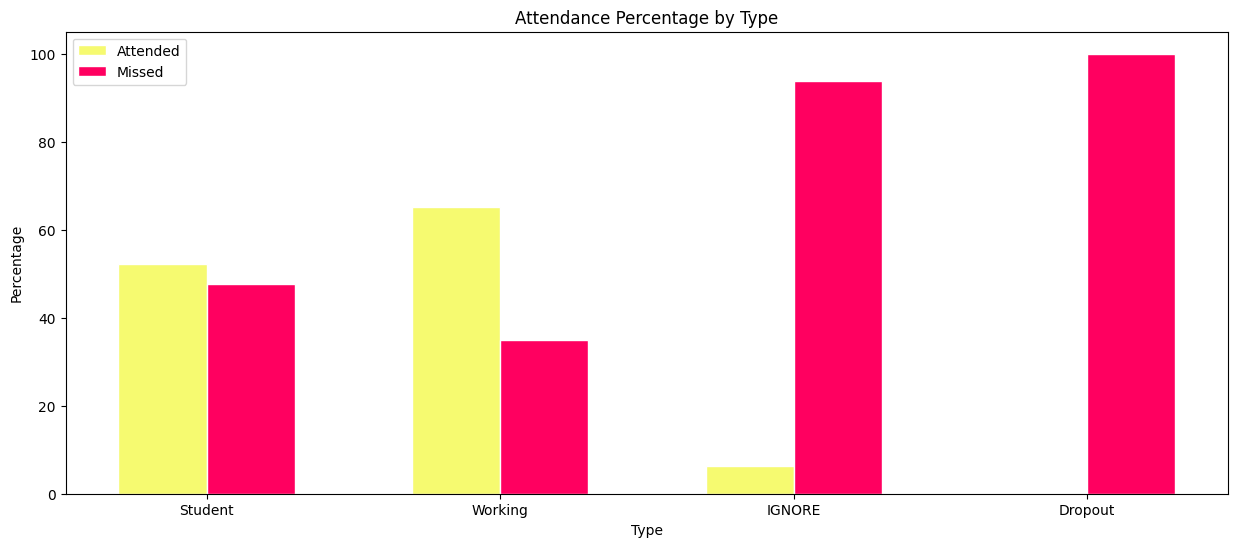

In [84]:
# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#F6FA70', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#FF0060', width=bar_width, edgecolor='white', label='Missed')

# Add labels, title, and legend
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
# Show the plot
plt.show()

1 . Students are almost equally attending and missing the classes need more focus on students.

2 . From above polt we can observe that Ignore, Dropout, Students are missing the sessions.

3 . Also Need to find the problem why ignore people are not attending calsses.

4 . Apart from Dropout and Ignore, student and Working are attending classes more.

In [85]:
student_ratings = df[df['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = df[df['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = df[df['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = df[df['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

In [86]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})


filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 7)]

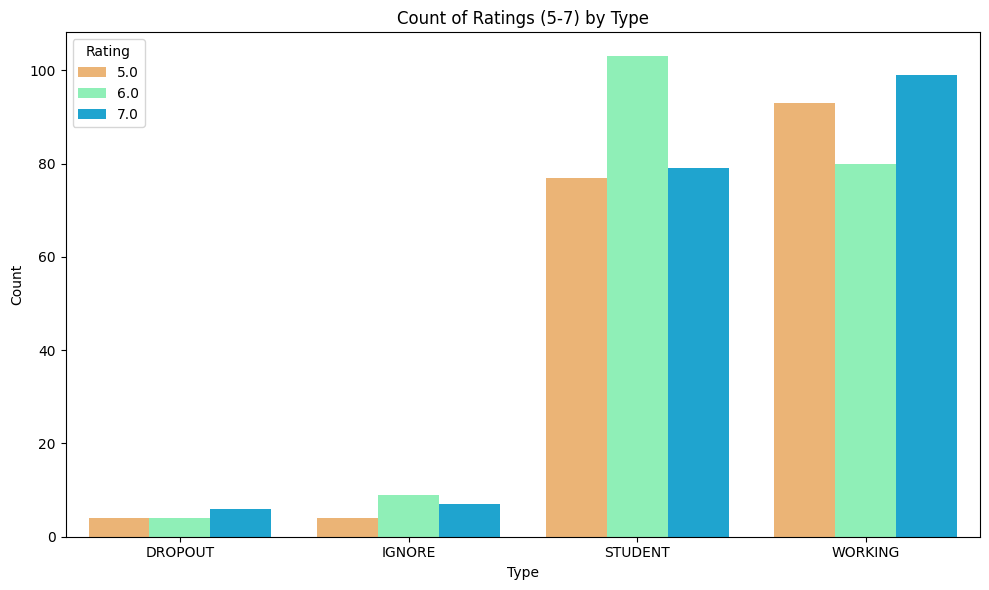

In [87]:
# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='rainbow_r')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-7) by Type')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

**Highly unsatisfied people are working people.**

1 . Above image shows that very Low rating(5) was given by working people.

2 . Above plot shows the 5-7 range ratings given by type of people.

3 . This also shows that dropout students are not satisfied because they have given low (5) ratings

4 . Followed by Students given low ratings.

In [88]:
# Concatenate the ratings and create a new dataframe
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

In [89]:
# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 8) & (df_ratings['Rating'] <= 10)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

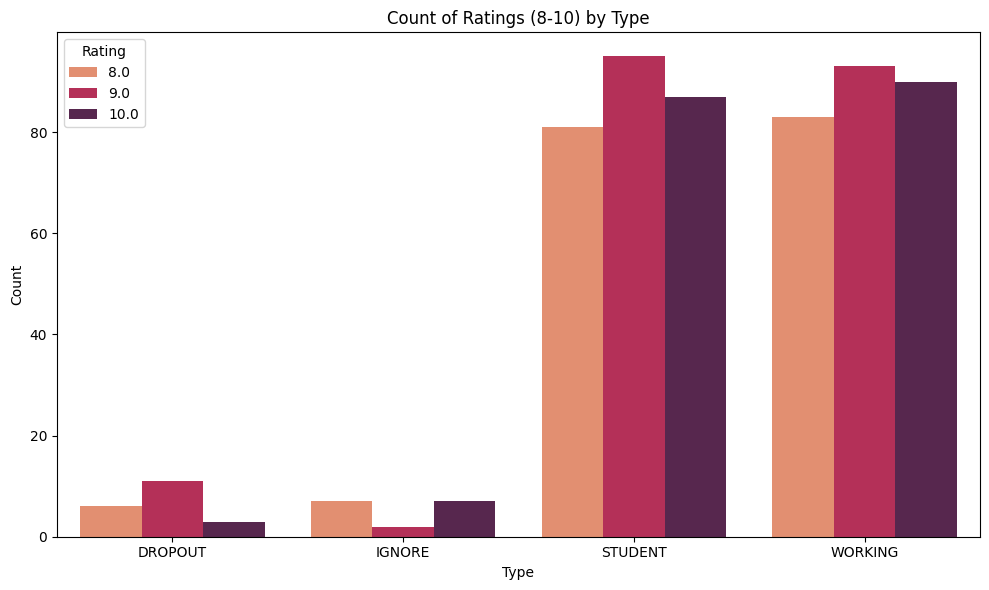

In [90]:
# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='rocket_r')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (8-10) by Type')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

**Highly Satisfied people are Students.**

1 . Above plot image shows the ratings range 8-10.

2 . Highest rating 10 was highly given by students followed by working people.

**We can check individual class perfomance and ratings**

Visualizing the class-1 and class-2 ratings

In [93]:
student_ratings = cls1[cls1['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = cls1[cls1['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = cls1[cls1['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = cls1[cls1['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]


In [94]:
student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

In [95]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 10)]

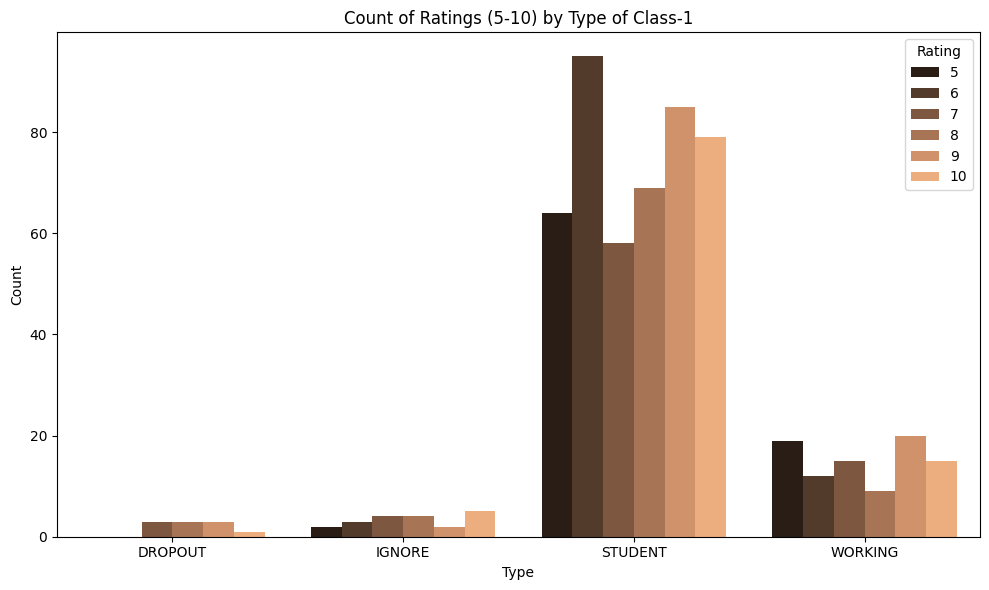

In [96]:
# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='copper')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-10) by Type of Class-1')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

In [97]:
cls2['Type'] == 'STUDENT'

0     False
1     False
2      True
3     False
4     False
      ...  
65    False
66     True
67    False
68    False
69    False
Name: Type, Length: 70, dtype: bool

1 . In class-1 Highest satisfied people are Students and they have given highest 10 rating.

2 . Also Lowest 5 ratings are highly given by students only followed by working people.

In [98]:
student_ratings = cls1[cls1['Type'] == 'STUDENT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
working_ratings = cls1[cls1['Type'] == 'WORKING'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
ignore_ratings = cls1[cls1['Type'] == 'IGNORE'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]
dropout_ratings = cls1[cls1['Type'] == 'DROPOUT'][['R-10-01-21', 'R-9-01-21', 'R-8-01-21', 'R-7-01-21', 'R-6-01-21', 'R-5-01-21', 'R-4-01-21', 'R-3-01-21', 'R-02-01-21', 'R-01-01-21']]

In [ ]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 10)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

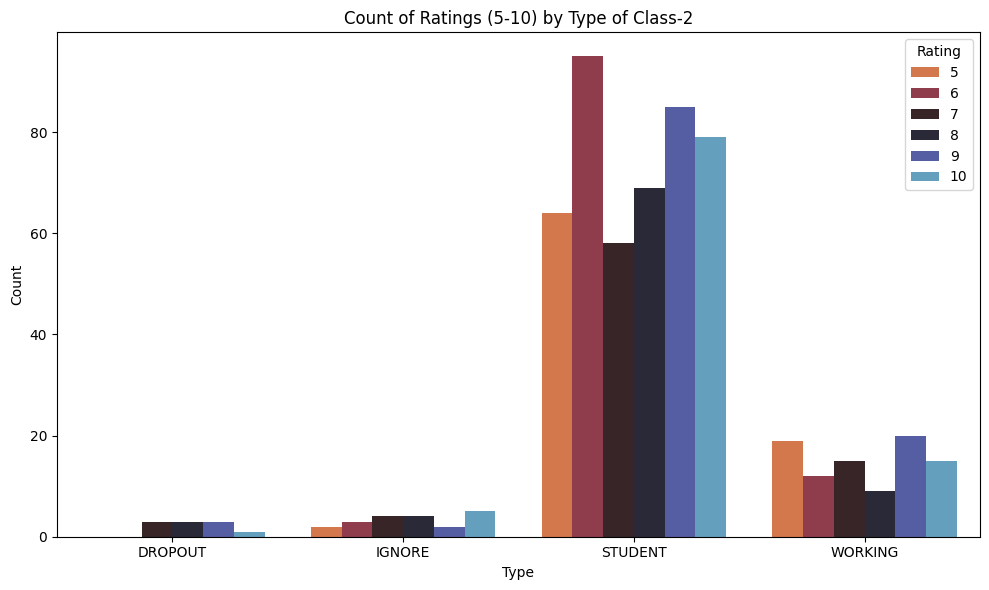

In [101]:
# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='icefire_r')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-10) by Type of Class-2')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

1 . In class-2 Working people are high but they are unsatisfied due to they have given high 5 ratings.

2 . High 10 ratings are also given by woorking people only.

3 . But students in class-2 also unsatisfied because they have given high 7 ratings.

**Conclusion :**

1 . In both classes we have seen mixed ratings.

2 . In class-1 highest people are students and in class-2 highest people are working.

In [102]:
# Calculate the attendance count and missed count for each type
cls1['Attended_Count'] = cls1[cls1 == 'Attended'].count(axis=1)
cls1['Missed_Count'] = cls1[cls1 == 'Missed'].count(axis=1)

# Calculate the total sessions for each type
cls1['Total_Sessions'] = cls1[['Attended_Count', 'Missed_Count']].sum(axis=1)

In [103]:
# Calculate the attendance percentage and missed percentage for each type
cls1['Attended_Percentage'] = (cls1['Attended_Count'] / cls1['Total_Sessions']) * 100
cls1['Missed_Percentage'] = (cls1['Missed_Count'] / cls1['Total_Sessions']) * 100

In [104]:
student_data = cls1[cls1['Type'] == 'STUDENT']
working_data = cls1[cls1['Type'] == 'WORKING']
ignore_data = cls1[cls1['Type'] == 'IGNORE']
dropout_data = cls1[cls1['Type'] == 'DROPOUT']

In [105]:
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

In [106]:
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

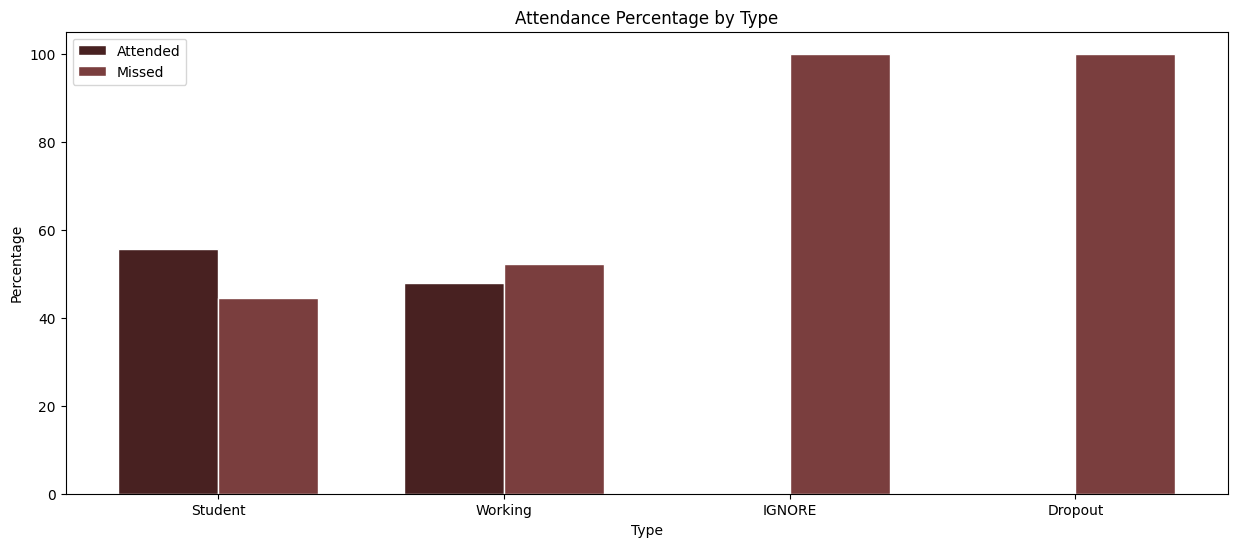

In [107]:
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#482121', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#7A3E3E', width=bar_width, edgecolor='white', label='Missed')

plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
plt.show()

In [108]:
# Calculate the attendance count and missed count for each type
cls2['Attended_Count'] = cls2[cls2 == 'Attended'].count(axis=1)
cls2['Missed_Count'] = cls2[cls2 == 'Missed'].count(axis=1)

# Calculate the total sessions for each type
cls2['Total_Sessions'] = cls2[['Attended_Count', 'Missed_Count']].sum(axis=1)

# Calculate the attendance percentage and missed percentage for each type
cls2['Attended_Percentage'] = (cls2['Attended_Count'] / cls2['Total_Sessions']) * 100
cls2['Missed_Percentage'] = (cls2['Missed_Count'] / cls2['Total_Sessions']) * 100

In [109]:
student_data = cls2[cls2['Type'] == 'STUDENT']
working_data = cls2[cls2['Type'] == 'WORKING']
ignore_data = cls2[cls2['Type'] == 'IGNORE']
dropout_data = cls2[cls2['Type'] == 'DROPOUT']

# Prepare data for plotting
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['Attended_Percentage'].mean(),
    working_data['Attended_Percentage'].mean(),
    ignore_data['Attended_Percentage'].mean(),
    dropout_data['Attended_Percentage'].mean()
]

missed_percentage = [
    student_data['Missed_Percentage'].mean(),
    working_data['Missed_Percentage'].mean(),
    ignore_data['Missed_Percentage'].mean(),
    dropout_data['Missed_Percentage'].mean()
]

In [110]:
# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

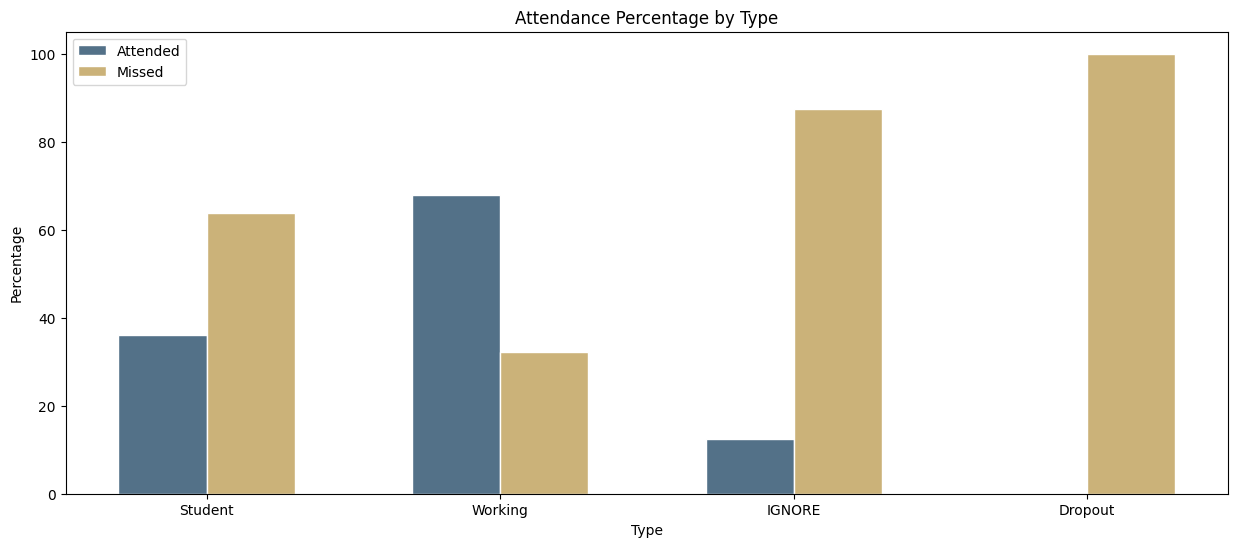

In [111]:
# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(r1, attended_percentage, color='#537188', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='#CBB279', width=bar_width, edgecolor='white', label='Missed')

# Add labels, title, and legend
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Attendance Percentage by Type')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
# Show the plot
plt.show()

***Conclusion***:

1 . It's been observed that in both classes dropouts and ignoring people are high.

2 . Students and working people in both classes are ignoring major classes.

3 . Need to focus on students and working people to increase high attendence